In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for feature decomposition
from sklearn.decomposition import PCA

# for clustering
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('State wise data for EV.csv')

In [3]:
df.head()

,State,EV SALES (2019),EV SALES (2020),EV SALES (2021),EV SALES (2022),EV SALES (2023),EV SALES (2024)
0,ANDAMAN & NICOBAR ISLAND,2,36,92,23,26,12
1,ANDHRA PRADESH,2162,1647,9688,29374,32838,15430
2,ARUNACHAL PRADESH,1,5,2,2,21,13
3,ASSAM,10866,8357,15632,40704,60798,18378
4,BIHAR,12380,12447,23083,55752,88216,30912


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   State            33 non-null     object
 1   EV SALES (2019)  33 non-null     int64 
 2   EV SALES (2020)  33 non-null     int64 
 3   EV SALES (2021)  33 non-null     int64 
 4   EV SALES (2022)  33 non-null     int64 
 5   EV SALES (2023)  33 non-null     int64 
 6   EV SALES (2024)  33 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.9+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,33,33,ANDAMAN & NICOBAR ISLAND,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EV SALES (2019),33.0,NaN,NaN,NaN,5056.787879,10467.043263,0.0,54.0,1160.0,5818.0,55799.0
EV SALES (2020),33.0,NaN,NaN,NaN,3777.939394,6237.091294,0.0,82.0,1366.0,5604.0,31270.0
EV SALES (2021),33.0,NaN,NaN,NaN,10048.060606,14395.353208,1.0,326.0,4643.0,10438.0,66708.0
EV SALES (2022),33.0,NaN,NaN,NaN,31061.484848,40695.040711,2.0,1007.0,14055.0,40704.0,162870.0
EV SALES (2023),33.0,NaN,NaN,NaN,46426.939394,62991.951095,6.0,1128.0,21433.0,73649.0,278184.0
EV SALES (2024),33.0,NaN,NaN,NaN,17399.212121,23214.295204,2.0,460.0,10569.0,26490.0,98156.0


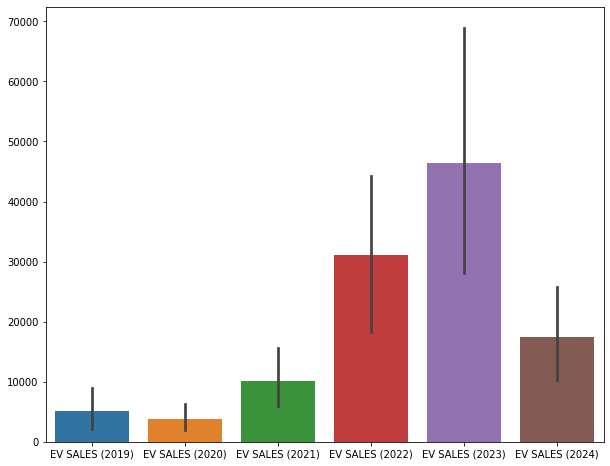

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
sns.barplot(data=df);

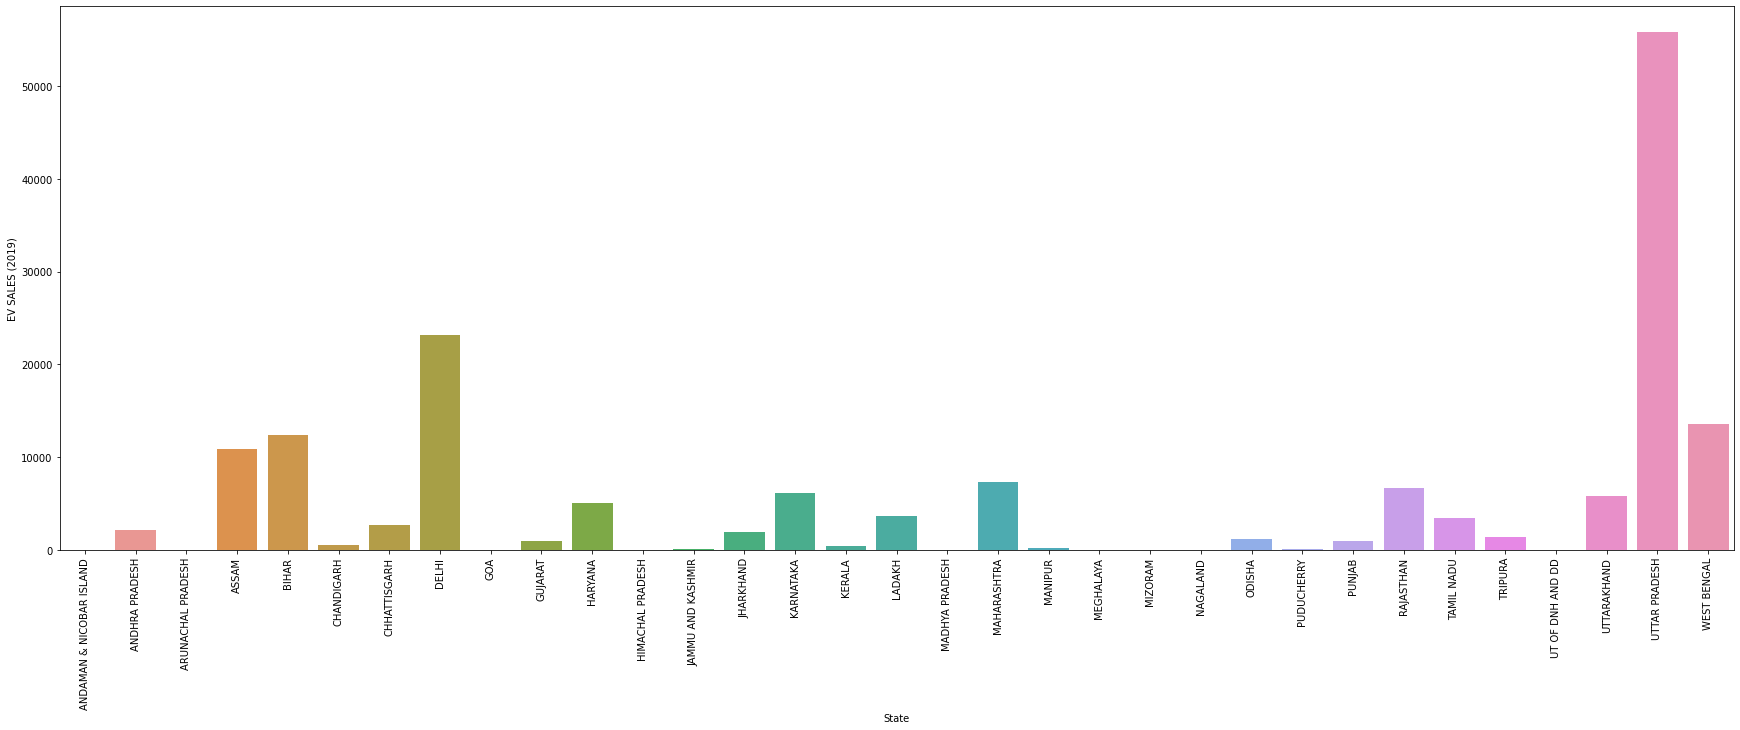

In [7]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(df,x="State",y="EV SALES (2019)");

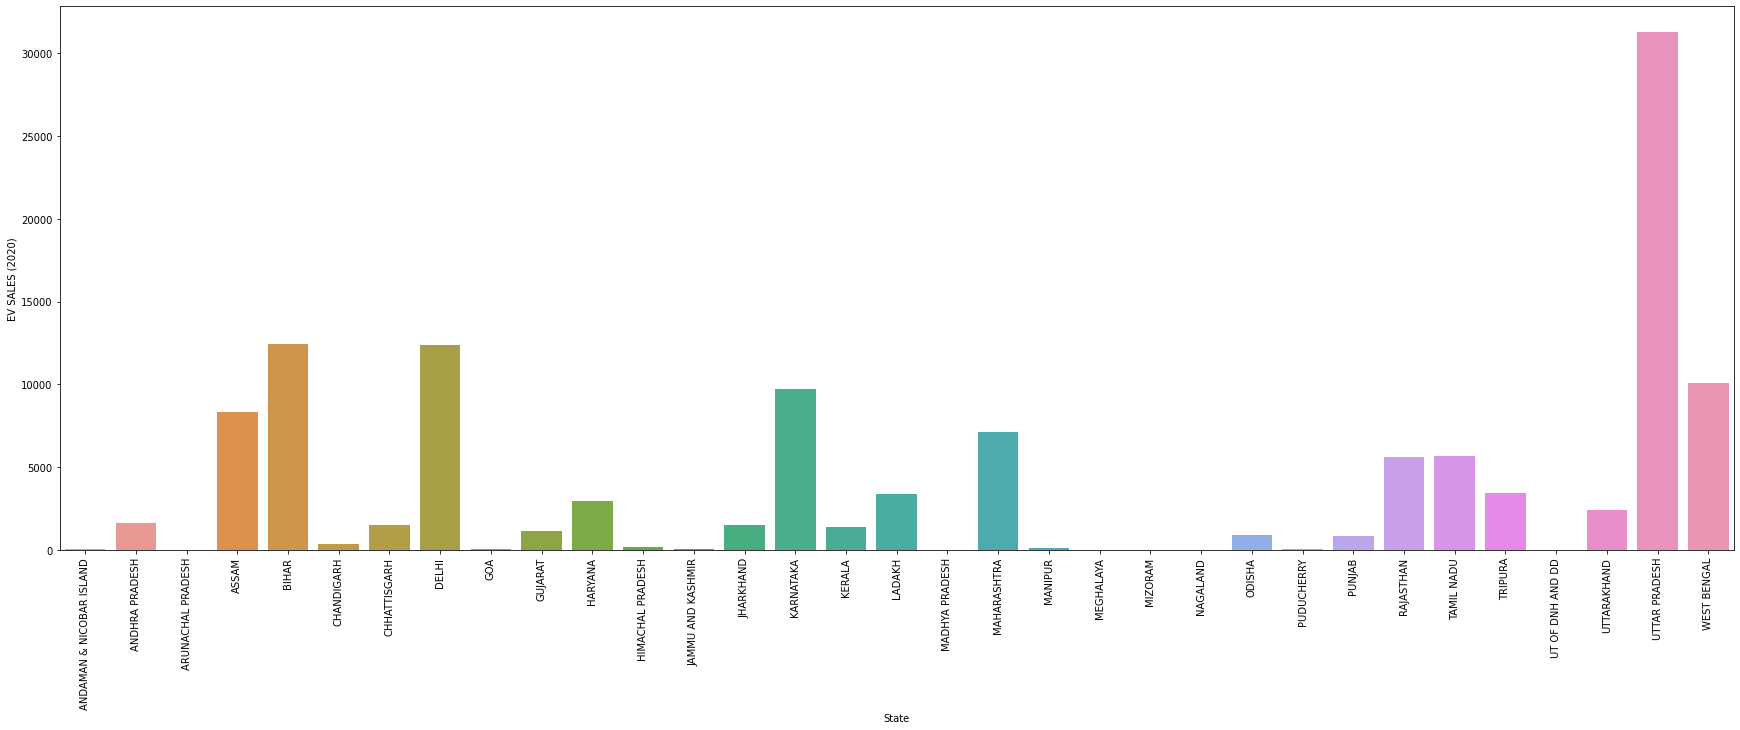

In [8]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(df,x="State",y="EV SALES (2020)");

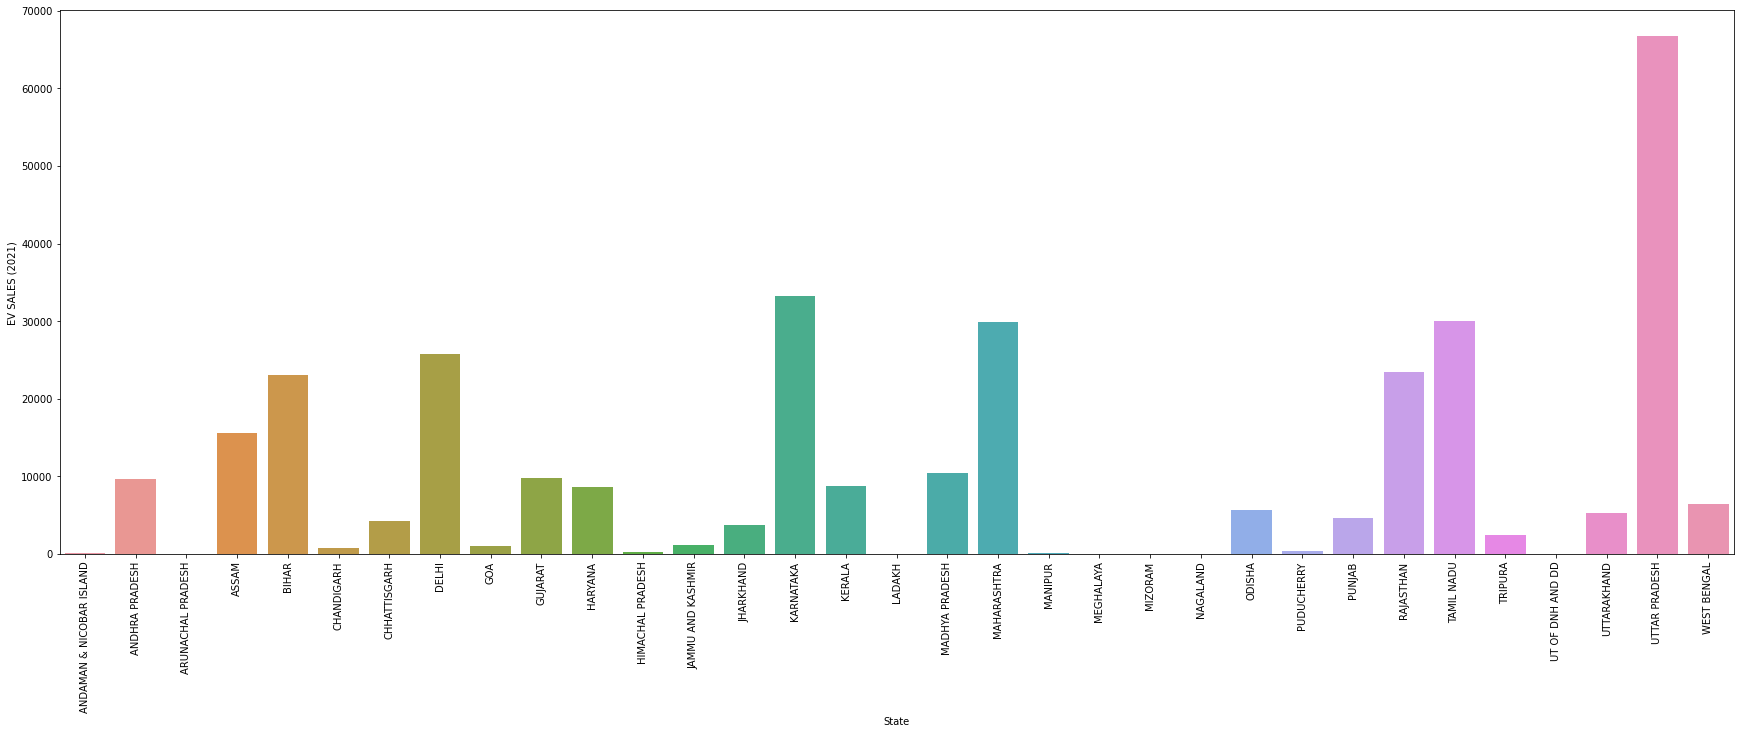

In [9]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(df,x="State",y="EV SALES (2021)");

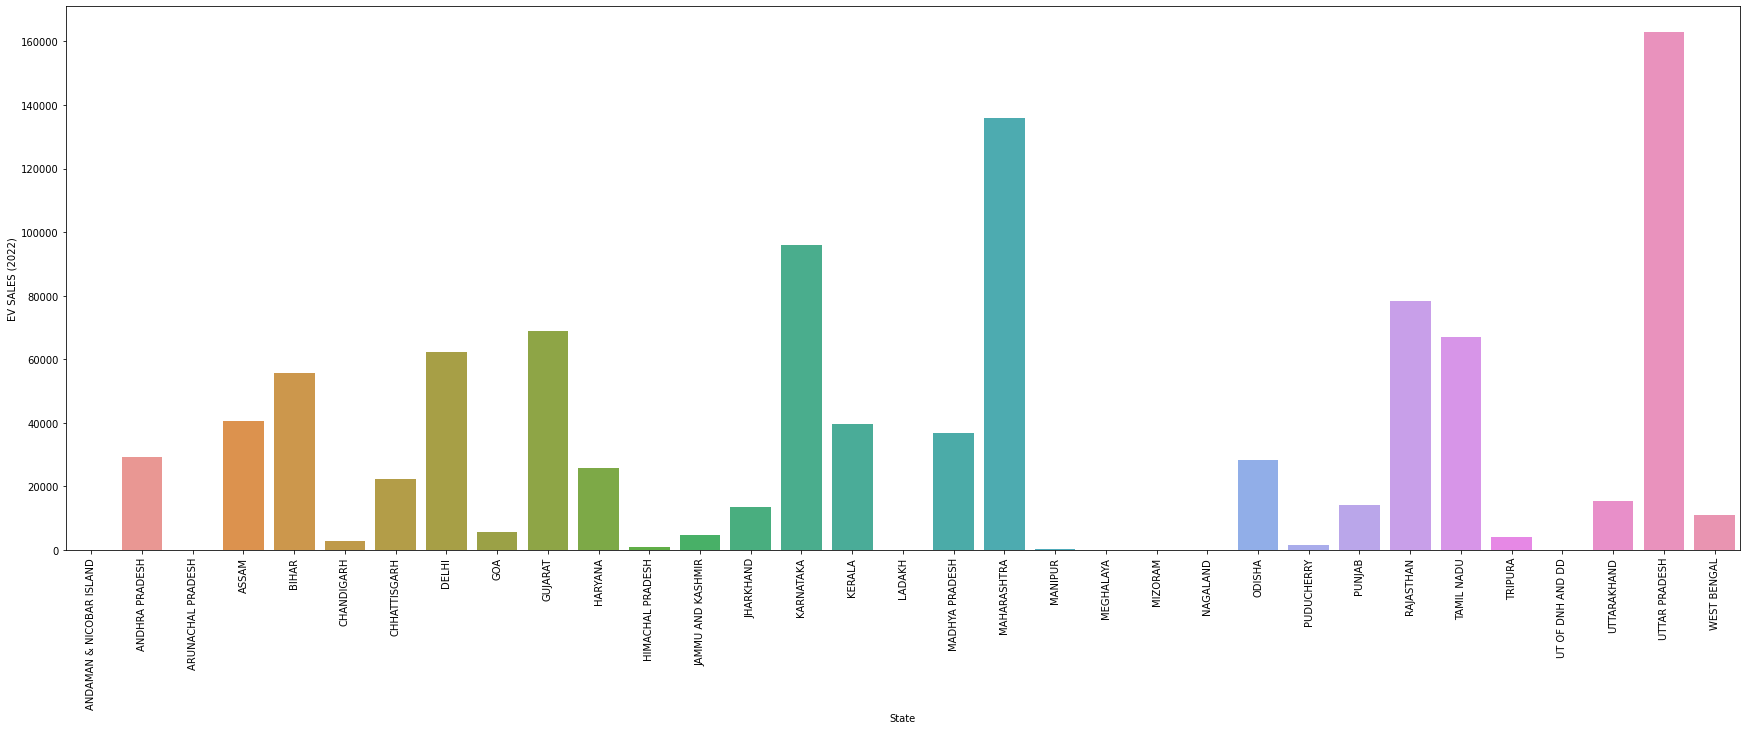

In [10]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(df,x="State",y="EV SALES (2022)");

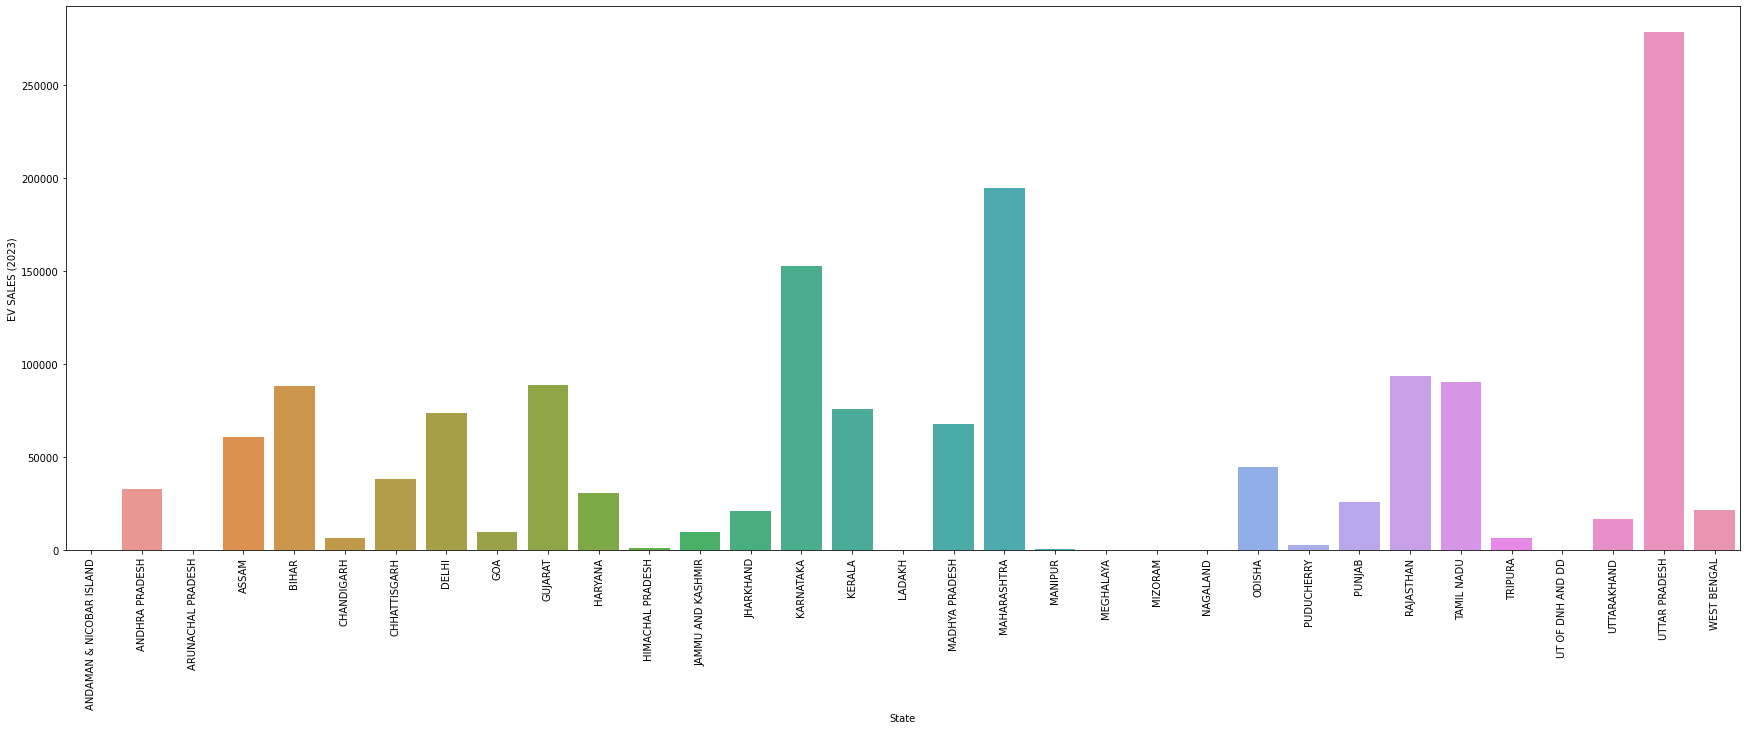

In [11]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(df,x="State",y="EV SALES (2023)");

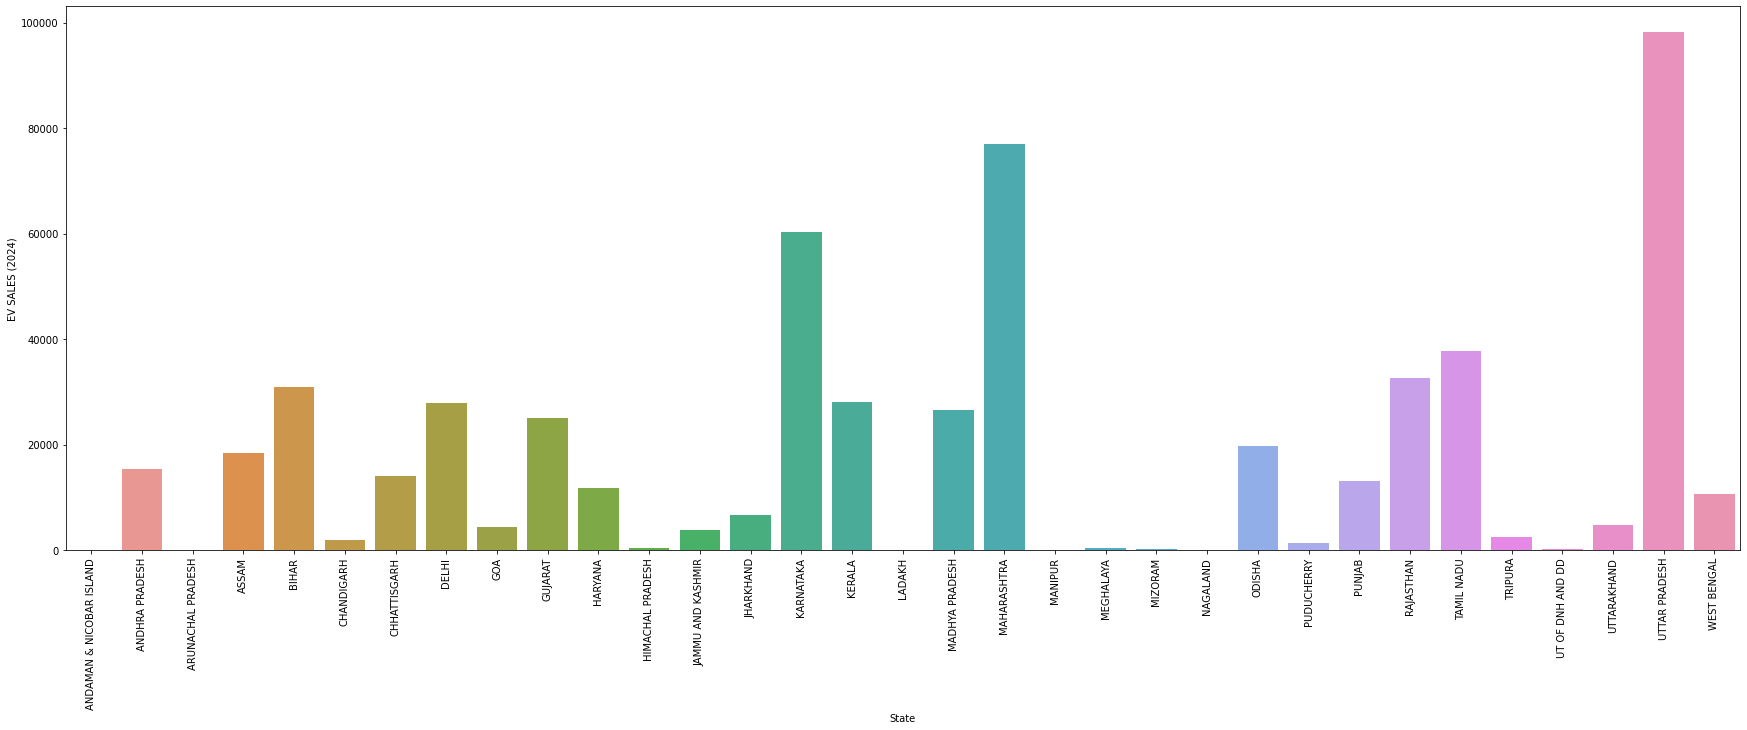

In [12]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(df,x="State",y="EV SALES (2024)");

In [13]:
df.groupby('State')['EV SALES (2019)'].max().sort_values(ascending=False)

State
UTTAR PRADESH               55799
DELHI                       23221
WEST BENGAL                 13533
BIHAR                       12380
ASSAM                       10866
MAHARASHTRA                  7317
RAJASTHAN                    6634
KARNATAKA                    6146
UTTARAKHAND                  5818
HARYANA                      5108
LADAKH                       3687
TAMIL NADU                   3444
CHHATTISGARH                 2744
ANDHRA PRADESH               2162
JHARKHAND                    1931
TRIPURA                      1459
ODISHA                       1160
PUNJAB                        961
GUJARAT                       946
CHANDIGARH                    507
KERALA                        483
MANIPUR                       251
PUDUCHERRY                     81
JAMMU AND KASHMIR              76
HIMACHAL PRADESH               54
GOA                            41
NAGALAND                       29
UT OF DNH AND DD               19
MEGHALAYA                      13
ANDAMAN 

In [14]:
df.groupby('State')['EV SALES (2020)'].max().sort_values(ascending=False)

State
UTTAR PRADESH               31270
BIHAR                       12447
DELHI                       12378
WEST BENGAL                 10079
KARNATAKA                    9699
ASSAM                        8357
MAHARASHTRA                  7132
TAMIL NADU                   5696
RAJASTHAN                    5604
TRIPURA                      3421
LADAKH                       3360
HARYANA                      2982
UTTARAKHAND                  2394
ANDHRA PRADESH               1647
JHARKHAND                    1516
CHHATTISGARH                 1489
KERALA                       1366
GUJARAT                      1122
ODISHA                        903
PUNJAB                        832
CHANDIGARH                    369
HIMACHAL PRADESH              181
MANIPUR                       104
PUDUCHERRY                     88
GOA                            82
JAMMU AND KASHMIR              74
ANDAMAN & NICOBAR ISLAND       36
UT OF DNH AND DD               24
NAGALAND                       11
ARUNACHA

In [15]:
df.groupby('State')['EV SALES (2021)'].max().sort_values(ascending=False)

State
UTTAR PRADESH               66708
KARNATAKA                   33304
TAMIL NADU                  30030
MAHARASHTRA                 29914
DELHI                       25815
RAJASTHAN                   23464
BIHAR                       23083
ASSAM                       15632
MADHYA PRADESH              10438
GUJARAT                      9765
ANDHRA PRADESH               9688
KERALA                       8734
HARYANA                      8660
WEST BENGAL                  6409
ODISHA                       5626
UTTARAKHAND                  5325
PUNJAB                       4643
CHHATTISGARH                 4215
JHARKHAND                    3741
TRIPURA                      2434
JAMMU AND KASHMIR            1146
GOA                          1096
CHANDIGARH                    734
PUDUCHERRY                    405
HIMACHAL PRADESH              326
MANIPUR                       114
ANDAMAN & NICOBAR ISLAND       92
UT OF DNH AND DD               29
LADAKH                          6
MEGHALAY

In [16]:
df.groupby('State')['EV SALES (2022)'].max().sort_values(ascending=False)

State
UTTAR PRADESH               162870
MAHARASHTRA                 136040
KARNATAKA                    95856
RAJASTHAN                    78248
GUJARAT                      68994
TAMIL NADU                   66998
DELHI                        62257
BIHAR                        55752
ASSAM                        40704
KERALA                       39618
MADHYA PRADESH               36809
ANDHRA PRADESH               29374
ODISHA                       28443
HARYANA                      25862
CHHATTISGARH                 22365
UTTARAKHAND                  15560
PUNJAB                       14055
JHARKHAND                    13682
WEST BENGAL                  11151
GOA                           5687
JAMMU AND KASHMIR             4690
TRIPURA                       4178
CHANDIGARH                    2721
PUDUCHERRY                    1481
HIMACHAL PRADESH              1007
MANIPUR                        341
UT OF DNH AND DD               141
MEGHALAYA                       41
LADAKH        

In [17]:
df.groupby('State')['EV SALES (2023)'].max().sort_values(ascending=False)

State
UTTAR PRADESH               278184
MAHARASHTRA                 194383
KARNATAKA                   152635
RAJASTHAN                    93765
TAMIL NADU                   90294
GUJARAT                      88617
BIHAR                        88216
KERALA                       75793
DELHI                        73649
MADHYA PRADESH               67928
ASSAM                        60798
ODISHA                       44551
CHHATTISGARH                 38220
ANDHRA PRADESH               32838
HARYANA                      30488
PUNJAB                       25738
WEST BENGAL                  21433
JHARKHAND                    21126
UTTARAKHAND                  16796
JAMMU AND KASHMIR             9749
GOA                           9481
CHANDIGARH                    6408
TRIPURA                       6312
PUDUCHERRY                    2638
HIMACHAL PRADESH              1128
MANIPUR                        399
MIZORAM                        166
UT OF DNH AND DD               161
MEGHALAYA     

In [18]:
df.groupby('State')['EV SALES (2024)'].max().sort_values(ascending=False)

State
UTTAR PRADESH               98156
MAHARASHTRA                 76951
KARNATAKA                   60351
TAMIL NADU                  37645
RAJASTHAN                   32593
BIHAR                       30912
KERALA                      28148
DELHI                       27895
MADHYA PRADESH              26490
GUJARAT                     25062
ODISHA                      19804
ASSAM                       18378
ANDHRA PRADESH              15430
CHHATTISGARH                14088
PUNJAB                      13096
HARYANA                     11733
WEST BENGAL                 10569
JHARKHAND                    6691
UTTARAKHAND                  4704
GOA                          4430
JAMMU AND KASHMIR            3889
TRIPURA                      2534
CHANDIGARH                   1896
PUDUCHERRY                   1429
MEGHALAYA                     460
HIMACHAL PRADESH              421
MIZORAM                       155
UT OF DNH AND DD              123
MANIPUR                       100
LADAKH  

C:\Users\aunsa\AppData\Local\Temp\ipykernel_14324\2729275178.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(),annot=True);


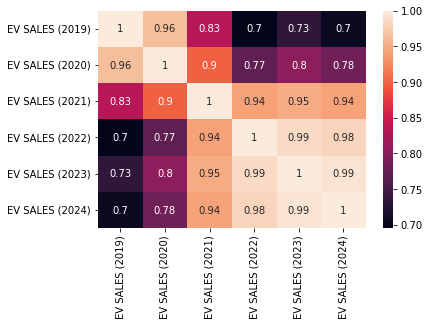

In [19]:
sns.heatmap(data=df.corr(),annot=True);

In [20]:
df1=df.drop('State',axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [22]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [23]:
wardlink = linkage(df1, method = 'ward',metric='euclidean')

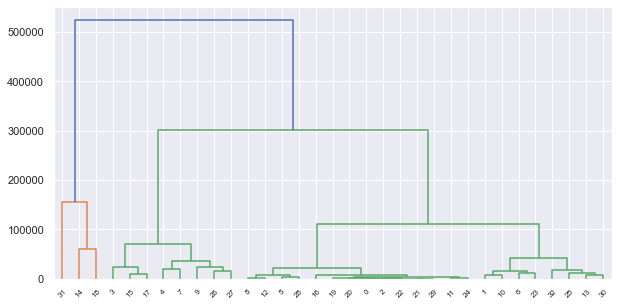

In [24]:
plt.figure(figsize=(10,5))
dend = dendrogram(wardlink)

In [25]:
k_means = KMeans(n_clusters = 10,random_state=1)

In [26]:
k_means.fit(df1)

KMeans(n_clusters=10, random_state=1)

In [27]:
k_means.labels_

array([0, 5, 0, 1, 7, 0, 5, 7, 0, 4, 5, 0, 0, 8, 6, 1, 0, 1, 2, 0, 0, 0,
       0, 5, 0, 8, 9, 9, 0, 0, 8, 3, 8])

In [28]:
k_means.inertia_

1381359233.1071427

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [30]:
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.5172843984884157

In [31]:
k_means = KMeans(n_clusters =9,random_state=1)
k_means.fit(df1)
labels = k_means.labels_

In [32]:
silhouette_score(df1,labels,random_state=1)

0.5248809161908143

In [33]:
k_means = KMeans(n_clusters =8,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.5434450733121651

In [34]:
k_means = KMeans(n_clusters =7,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.557375745694542

In [35]:
k_means = KMeans(n_clusters =6,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.5786266100712436

In [36]:
k_means = KMeans(n_clusters =5,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.6025869509642731

In [37]:
k_means = KMeans(n_clusters =4,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.6548215143568001

In [38]:
k_means = KMeans(n_clusters =3,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.6595707593606914

In [39]:
k_means = KMeans(n_clusters =2,random_state=1)
k_means.fit(df1)
labels = k_means.labels_
silhouette_score(df1,labels,random_state=1)

0.7285065172698892

In [40]:
sum_of_squared_distances = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df1)
    sum_of_squared_distances.append(kmeans.inertia_)

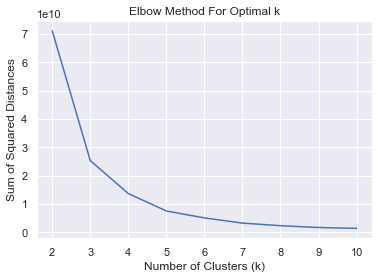

In [41]:
plt.plot(K_range, sum_of_squared_distances)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()    

In [42]:
df["Market_seg"] = labels
df.head(15)

,State,EV SALES (2019),EV SALES (2020),EV SALES (2021),EV SALES (2022),EV SALES (2023),EV SALES (2024),Market_seg
0,ANDAMAN & NICOBAR ISLAND,2,36,92,23,26,12,0
1,ANDHRA PRADESH,2162,1647,9688,29374,32838,15430,0
2,ARUNACHAL PRADESH,1,5,2,2,21,13,0
3,ASSAM,10866,8357,15632,40704,60798,18378,0
4,BIHAR,12380,12447,23083,55752,88216,30912,0
5,CHANDIGARH,507,369,734,2721,6408,1896,0
6,CHHATTISGARH,2744,1489,4215,22365,38220,14088,0
7,DELHI,23221,12378,25815,62257,73649,27895,0
8,GOA,41,82,1096,5687,9481,4430,0
9,GUJARAT,946,1122,9765,68994,88617,25062,0


<Axes: xlabel='Market_seg', ylabel='EV SALES (2019)'>

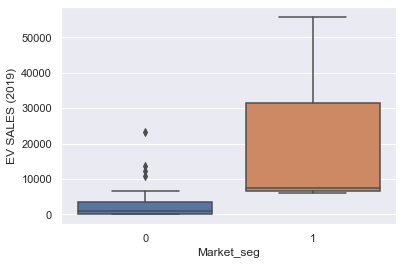

In [43]:
sns.boxplot(data=df,x='Market_seg',y='EV SALES (2019)')

In [44]:
df.Market_seg.value_counts().sort_index()

0    30
1     3
Name: Market_seg, dtype: int64

<Axes: xlabel='Market_seg', ylabel='EV SALES (2023)'>

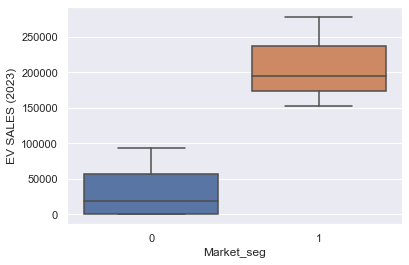

In [45]:
sns.boxplot(data=df,x='Market_seg',y='EV SALES (2023)')

In [46]:
df.groupby('State')['Market_seg'].mean().sort_values(ascending=False)

State
MAHARASHTRA                 1.0
UTTAR PRADESH               1.0
KARNATAKA                   1.0
PUDUCHERRY                  0.0
MANIPUR                     0.0
MEGHALAYA                   0.0
MIZORAM                     0.0
NAGALAND                    0.0
ODISHA                      0.0
ANDAMAN & NICOBAR ISLAND    0.0
MADHYA PRADESH              0.0
RAJASTHAN                   0.0
TAMIL NADU                  0.0
TRIPURA                     0.0
UT OF DNH AND DD            0.0
UTTARAKHAND                 0.0
PUNJAB                      0.0
LADAKH                      0.0
ANDHRA PRADESH              0.0
KERALA                      0.0
JHARKHAND                   0.0
JAMMU AND KASHMIR           0.0
HIMACHAL PRADESH            0.0
HARYANA                     0.0
GUJARAT                     0.0
GOA                         0.0
DELHI                       0.0
CHHATTISGARH                0.0
CHANDIGARH                  0.0
BIHAR                       0.0
ASSAM                       0.0
AR

In [47]:
df.groupby('Market_seg')['EV SALES (2019)'].max().sort_values(ascending=False)

Market_seg
1    55799
0    23221
Name: EV SALES (2019), dtype: int64

In [48]:
df.groupby('Market_seg')['EV SALES (2020)'].max().sort_values(ascending=False)

Market_seg
1    31270
0    12447
Name: EV SALES (2020), dtype: int64

In [49]:
df.groupby('Market_seg')['EV SALES (2021)'].max().sort_values(ascending=False)

Market_seg
1    66708
0    30030
Name: EV SALES (2021), dtype: int64

In [50]:
df.groupby('Market_seg')['EV SALES (2022)'].max().sort_values(ascending=False)

Market_seg
1    162870
0     78248
Name: EV SALES (2022), dtype: int64

In [51]:
df.groupby('Market_seg')['EV SALES (2023)'].max().sort_values(ascending=False)

Market_seg
1    278184
0     93765
Name: EV SALES (2023), dtype: int64

In [52]:
df.groupby('Market_seg')['EV SALES (2024)'].max().sort_values(ascending=False)

Market_seg
1    98156
0    37645
Name: EV SALES (2024), dtype: int64

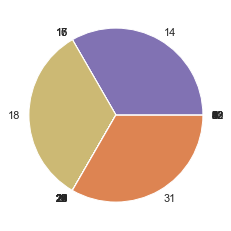

In [60]:
plt.pie(df['Market_seg'],labels=df.index);

In [71]:
a=df['EV SALES (2019)'].sum()
print("The total EV Sales in 2019 in India:",a)

The total EV Sales in 2019 in India: 166874


In [72]:
b=df['EV SALES (2020)'].sum()
print("The total EV Sales in 2020 in India:",b)

The total EV Sales in 2020 in India: 124672


In [74]:
c=df['EV SALES (2021)'].sum()
print("The total EV Sales in 2021 in India:",c)

The total EV Sales in 2021 in India: 331586


In [75]:
d=df['EV SALES (2022)'].sum()
print("The total EV Sales in 2022 in India:",d)

The total EV Sales in 2022 in India: 1025029


In [76]:
e=df['EV SALES (2023)'].sum()
print("The total EV Sales in 2023 in India:",e)

The total EV Sales in 2023 in India: 1532089


In [77]:
f=df['EV SALES (2024)'].sum()
print("The total EV Sales in 2024 in India:",f)

The total EV Sales in 2024 in India: 574174


In [78]:
df2=[a,b,c,d,e]
df2

[166874, 124672, 331586, 1025029, 1532089]

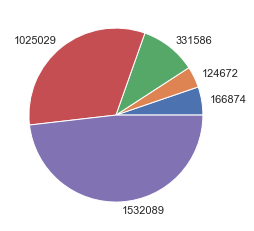

In [81]:
plt.pie(df2,labels=df2);